# <center> Traffic Sign Detection</center>

Traffic signs are important as they help the drivers to follow traffic rules and reduce the number of accidents on road. However, it is often very difficult for a driver to focus on the signs along with the other happenings on the road. In addition to this, traffic sign detection is also very important for the fast growing technology of automated driving and driverless cars.

<center><div>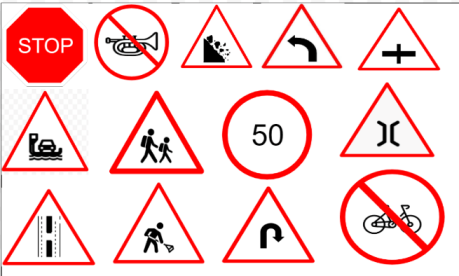</div></center>

In this notebook we use the [German Traffic Sign Recognition Benchmark](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign) Dataset which has lifelike images of traffic signs which a=have been classified into 43 classes. The train and test sets combined consist of more than 50000 images. We use a Convolutional Neural Network(CNN) for this purpose and achieve a **test set accuracy of more than 99%**.

Importing necessary libraries

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [15]:
def showImg(img):
    plt.figure(figsize =(5,5))
    plt.imshow(img,cmap='gray')
    plt.show()

In [9]:
def getClassName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'

Read dataset

In [10]:
imgs_path = "../input/gtsrb-german-traffic-sign/Train"
print(sorted(map(int,os.listdir('../input/gtsrb-german-traffic-sign/Train'))))

In [18]:
imgs_path = "../input/gtsrb-german-traffic-sign/Train"
data_list = []
labels_list = []
classes_list = 43
length_class_list = []
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    countClassList = 0
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
        countClassList += 1
        
    print(f"Class {i} have {countClassList} images")
    length_class_list .append(countClassList)
    
data = np.array(data_list)
labels = np.array(labels_list)

In [42]:
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    countClassList = 0
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        print(getClassName(i))

        print(np.array(im).shape)
        showImg(im)

        im = im.resize((32,32))
        print(np.array(im).shape)
        showImg(im)
        
        im = np.array(im)
        break

In [20]:
print(f"Dataset have {sum(length_class_list)} images")

In [21]:
print(labels)
print(labels.shape)
print(len(labels))

In [22]:
print(data.shape,end= '\n \n')
print(data[0], end= '\n \n')
print(data[0].shape)

In [23]:
print(len(data[0]))
data[0]

In [24]:
print(len(data[0][0]))
data[0][0]

In [25]:
plt.figure(figsize=(12,6))
plt.bar(range(0,classes_list),length_class_list)
plt.title('Distribution of Dataset')
plt.xlabel('Number of class')
plt.ylabel('Number of images')
plt.show()

## Dataset need to do data augmentation

In [26]:
print(min(length_class_list))
print(max(length_class_list))

In [27]:
print(len(data))
print(len(labels))

In [28]:
print(type(data[0]))

Data Visualization

The data seems pretty realistic which is a very good sign

Preparing the Dataset

In [44]:
def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y)) # 
    return (X_prep, y_prep)

X, y = prep_dataset(data,labels)

In [49]:
# Before pre_dataset
print(labels)
print(labels.shape)
print(labels[0])
# an list have 39209 elements

In [48]:
# After prep_dataset
print(y)
print(y.shape)
print(y[0])

In [ ]:
showImg(X[0].astype('int32'))

Splitting the dataset

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)
X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val, test_size=0.5, shuffle=True)

**CNN Model**

In [50]:
X.shape[1:]

### Conv2d
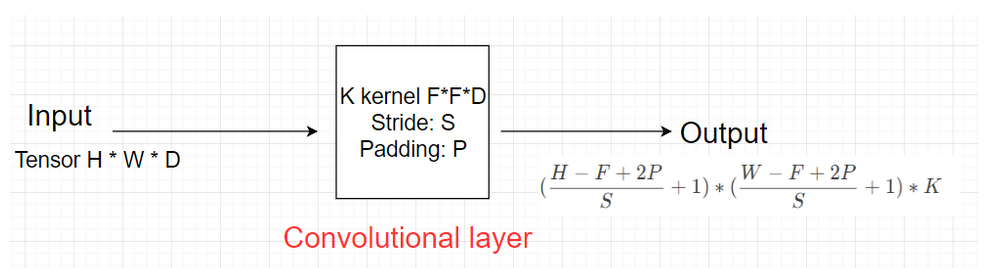

### Pooling
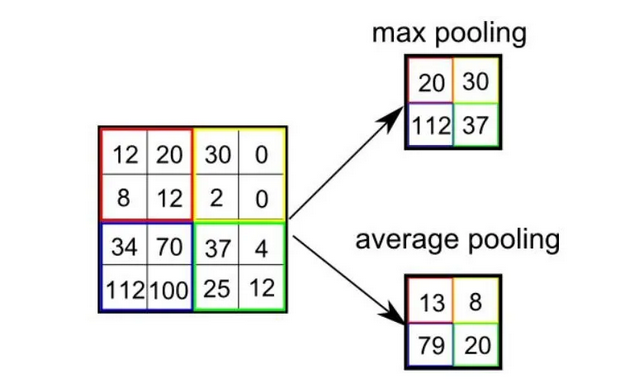

### Batch Normalization
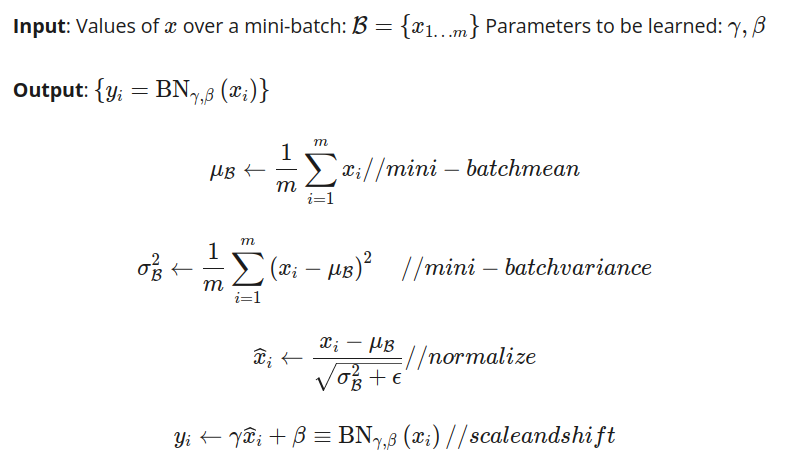

### Signoid function
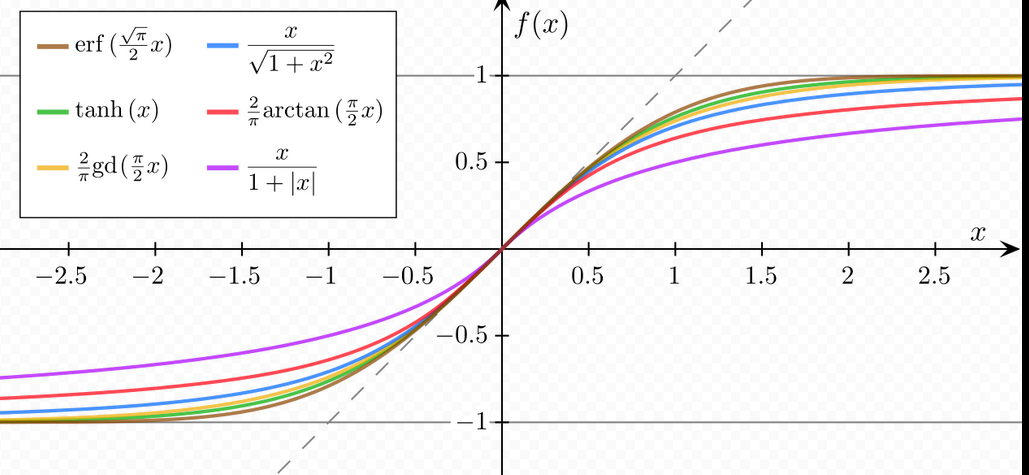

### Relu function
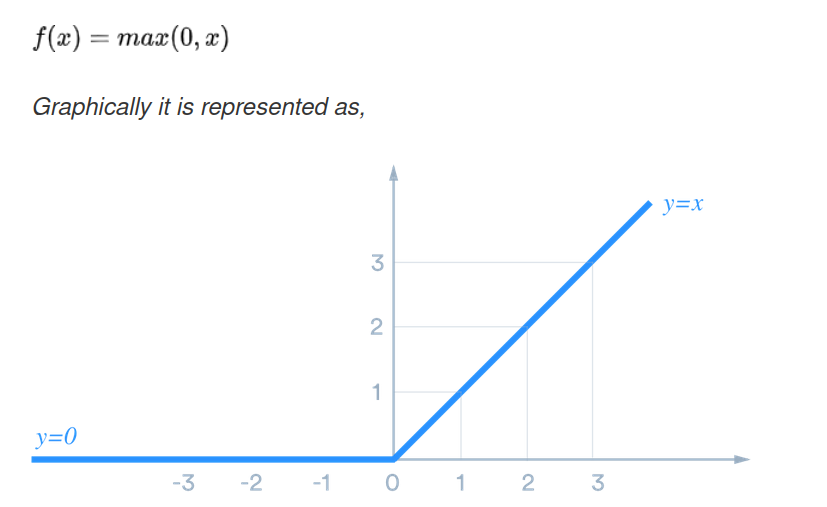

In [51]:
model = models.Sequential() #Sequential Model

# Layer 1
#ConvLayer(32 filters) + MaxPooling + BatchNormalization + Dropout
# Shape = 32x32x3 = Input shape
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=X.shape[1:]))
# When padding ='same' => padding =  1, Kich thuoc khong thay doi
model.add(layers.MaxPool2D(strides=2))

model.add(layers.BatchNormalization())

model.add(layers.Dropout(0.3)) 
# Reduce overfitting, shape = k doi
#0,3 có nghĩa là 30 phần trăm đầu vào sẽ bị loại bỏ sau mỗi lần cập nhật cho mô hình.

# Layer 2
#ConvLayer(128 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

# Layer 3
#ConvLayer(512 filters) + Dropout + ConvLayer(512 filters) + MaxPooling + BatchNormalization
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same')) 
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same')) 
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())

#Flatten
model.add(layers.Flatten())


#2 Dense(fully connected) layers with 4000 hidden units
model.add(layers.Dense(4000,activation='relu'))
model.add(layers.Dense(4000,activation='relu'))

#Dense layer with 1000 hidden units
model.add(layers.Dense(1000,activation='relu'))

#Softmax layer for output
model.add(layers.Dense(43,activation='softmax'))

model.summary()

Fitting the model

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history= model.fit(X_train,Y_train,
                 epochs=1000,
                 batch_size=64,
                 validation_data=(X_val,Y_val))
model.save('tfmodel')

Visualisation of accuracy and loss

In [ ]:
fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')

Prediction and Evaluation

In [ ]:
Y_test = np.argmax(Y_test,axis=1)

Y_pred= model.predict(X_test)

Y_pred = np.argmax(Y_pred, axis=1)

print('-Acuracy achieved: {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format(accuracy_score(Y_test,Y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

# Thank You

In [ ]:
len(Y_pred)

In [ ]:
showImg(X_test[0].astype('int32'))
print(getCalssName(Y_pred[0]))

In [ ]:
img = Image.open('../input/mytest/No entry 1.jpg')
showImg(img)

img = img.resize((32,32))
showImg(img)

img = np.array(img)
# img = np.array(img)
img = img.astype('float32')
img = img.reshape(1,32,32,3)

In [ ]:
Y_pred = model.predict(img)
Y_pred = np.argmax(Y_pred, axis=1)
print(getClassName(Y_pred))

In [ ]:
! pip install gdown

In [ ]:
import gdown
url = 'https://drive.google.com/drive/folders/1-FbRcLpviCfG8-QyPuUrwa-DaNYer5I-?usp=sharing' 
!gdown --id 1-FbRcLpviCfG8-QyPuUrwa-DaNYer5I-  --folder

In [ ]:
len("1_YdXDKBJhib_R6aHMi-SwUedzwkMLa_4")

In [ ]:
# example of vertical shift image augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# load the image
img = load_img('../input/mytest/Priority road.jpg')
print(img)
print(type(img))
print('\n')

# convert to numpy array
data = img_to_array(img)
print(data)
print(data.shape)
print('\n')

# expand dimension to one sample
samples = expand_dims(data, 0)
print(samples.shape)

# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

In [ ]:
model.save('')

In [ ]:
del model

In [ ]:
from tensorflow.keras.models import Sequential, load_model
model = load_model('../input/tfmodel/tfmodel')